In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager,rc 
import folium
import json
#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
#- 값 깨짐 방지
matplotlib.rcParams['axes.unicode_minus']=False

%matplotlib inline

#폰트 선명하게 보이도록 설정 
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [2]:
loc=pd.read_csv('result data/최종 스마트폴 후보지(완성).csv')
test=pd.read_csv('data/최종데이터프레임.csv')
test2=pd.read_csv('data/구별 데이터프레임.csv')

In [3]:
pp=pd.read_csv('data/구별 인구데이터.csv')
pp=pp.sort_values(by='합계',ascending=False)
pp=pp.reset_index(drop=True)

In [4]:
test2=test2[['Unnamed: 0','공영주차장(구별 개수)','전체 충전소(구별 개수)','전기차 등록현황(구별)',"환경부8/20충전소사용량(구별)",'7시 교통량(구별)','15시 교통량(구별)']]
test2=test2.rename(columns={"환경부8/20충전소사용량(구별)":"환경부 충전소 사용량(구별)",'Unnamed: 0':'구'})
test2['9시기준 누적생활인구(구별)']=list(pp['합계'])

In [5]:
test2.head()

,구,공영주차장(구별 개수),전체 충전소(구별 개수),전기차 등록현황(구별),환경부 충전소 사용량(구별),7시 교통량(구별),15시 교통량(구별),9시기준 누적생활인구(구별)
0,강남구,59,227,7490,14,2659676,2571792,2.112358e+07
1,강동구,22,108,657,9,917964,898177,1.666951e+07
2,강북구,35,54,302,6,452893,438128,1.455675e+07
3,강서구,46,193,839,29,1300629,1206927,1.222510e+07
4,관악구,19,83,413,8,963254,844226,1.214517e+07


In [6]:
test=test[['공영주차장(동별 개수)','전체 충전소(동별 개수)','전기차 등록현황(동별)',"9시기준 누적생활인구(동별)","환경부8/20충전소사용량(동별)",'7시교통량(동별)','15시교통량(동별)']]
test=test.rename(columns={"환경부8/20충전소사용량(동별)":"환경부 충전소 사용량(동별)"})

In [7]:
# 구, 동 정보를 입력할 데이터프레임 불러옴
df=pd.read_csv('data/법정동코드.csv')
df=df[['구','동']]
df=df.sort_values(by='동')
df=df.reset_index(drop=True)
df=df.applymap(lambda x:str(x).strip())
df

,구,동
0,송파구,가락동
1,구로구,가리봉동
2,금천구,가산동
3,강서구,가양동
4,종로구,가회동
...,...,...
462,용산구,후암동
463,종로구,훈정동
464,동대문구,휘경동
465,동작구,흑석동


In [8]:
test['동']=list(df['동'])
test.head()

,공영주차장(동별 개수),전체 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),환경부 충전소 사용량(동별),7시교통량(동별),15시교통량(동별),동
0,4,19,163,2217030,1,258886,233350,가락동
1,1,3,5,309644,2,37925,33424,가리봉동
2,20,61,220,2363375,0,210345,185044,가산동
3,4,16,90,1703136,6,236764,221805,가양동
4,0,1,5,49270,0,2695,2596,가회동


In [9]:
test=test.sort_values(by='전체 충전소(동별 개수)')
test=test.reset_index(drop=True)
test[test['동']=='대치동']

,공영주차장(동별 개수),전체 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),환경부 충전소 사용량(동별),7시교통량(동별),15시교통량(동별),동
437,13,25,5938,2768820,2,350008,337874,대치동


In [10]:
test=test.sort_values(by='전기차 등록현황(동별)',ascending=False)
test=test.reset_index(drop=True)
test[test['동']=='대치동']

,공영주차장(동별 개수),전체 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),환경부 충전소 사용량(동별),7시교통량(동별),15시교통량(동별),동
0,13,25,5938,2768820,2,350008,337874,대치동


# 구별 입지 선정 결과 분석

In [11]:
loc['gu'].value_counts()

강서구     22
강남구     12
영등포구    12
송파구      8
마포구      5
중구       4
서대문구     4
구로구      4
종로구      3
강북구      3
성북구      1
광진구      1
동대문구     1
동작구      1
용산구      1
성동구      1
도봉구      1
은평구      1
노원구      1
금천구      1
서초구      1
Name: gu, dtype: int64

In [12]:
a=test2[['구','공영주차장(구별 개수)']]
a=a.sort_values(by='공영주차장(구별 개수)',ascending=False)
a=a.reset_index(drop=True)
a['순위']=a.index+1

b=test2[['구','전체 충전소(구별 개수)']]
b=b.sort_values(by='전체 충전소(구별 개수)')
b=b.reset_index(drop=True)
b['순위']=b.index+1

c=test2[['구','전기차 등록현황(구별)']]
c=c.sort_values(by='전기차 등록현황(구별)',ascending=False)
c=c.reset_index(drop=True)
c['순위']=c.index+1

d=test2[['구','환경부 충전소 사용량(구별)']]
d=d.sort_values(by='환경부 충전소 사용량(구별)',ascending=False)
d=d.reset_index(drop=True)
d['순위']=d.index+1

e=test2[['구','9시기준 누적생활인구(구별)']]
e=e.sort_values(by='9시기준 누적생활인구(구별)',ascending=False)
e=e.reset_index(drop=True)
e['순위']=e.index+1

f=test2[['구','7시 교통량(구별)']]
f=f.sort_values(by='7시 교통량(구별)',ascending=False)
f=f.reset_index(drop=True)
f['순위']=f.index+1

g=test2[['구','15시 교통량(구별)']]
g=g.sort_values(by='15시 교통량(구별)',ascending=False)
g=g.reset_index(drop=True)
g['순위']=g.index+1

### 그래프로 비교해보기

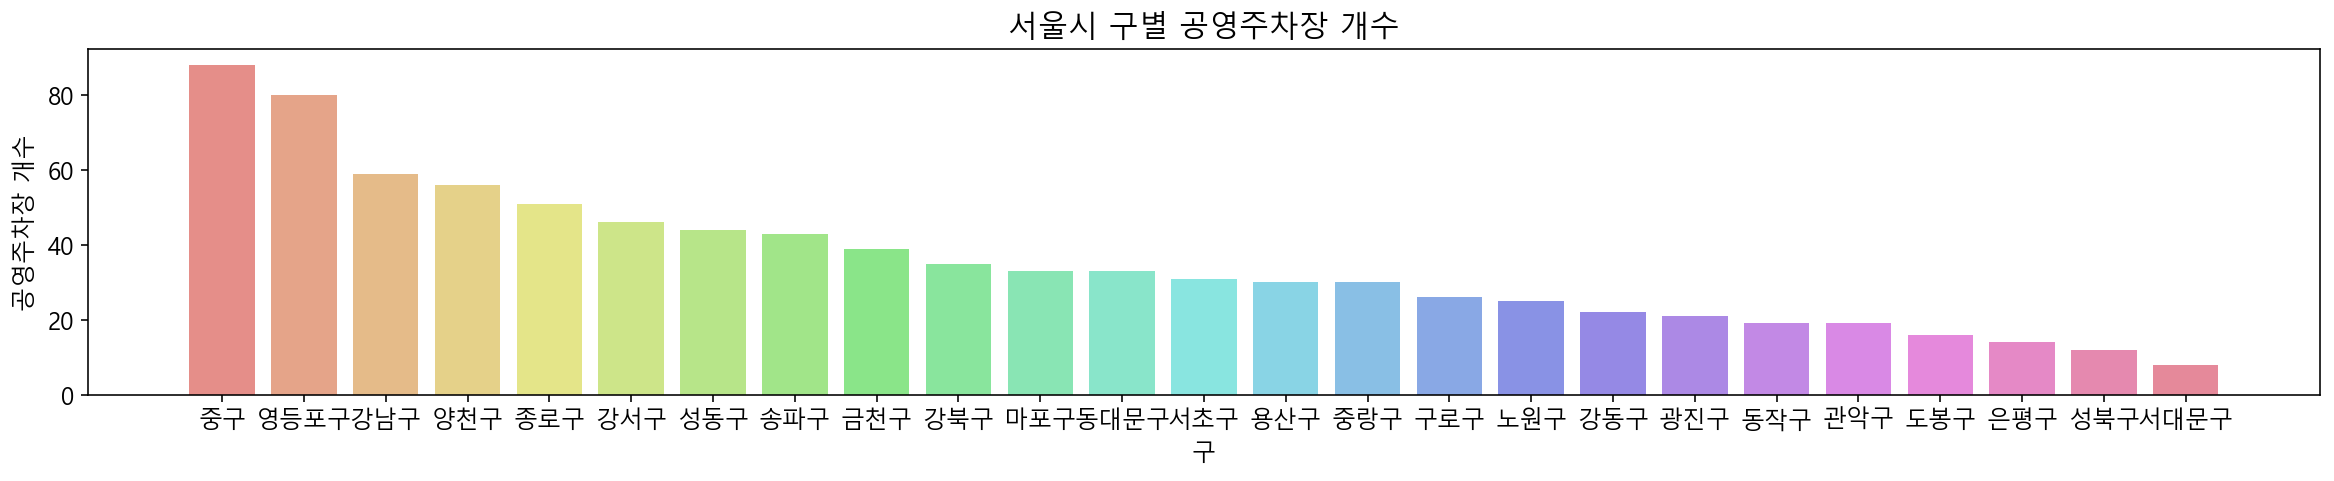

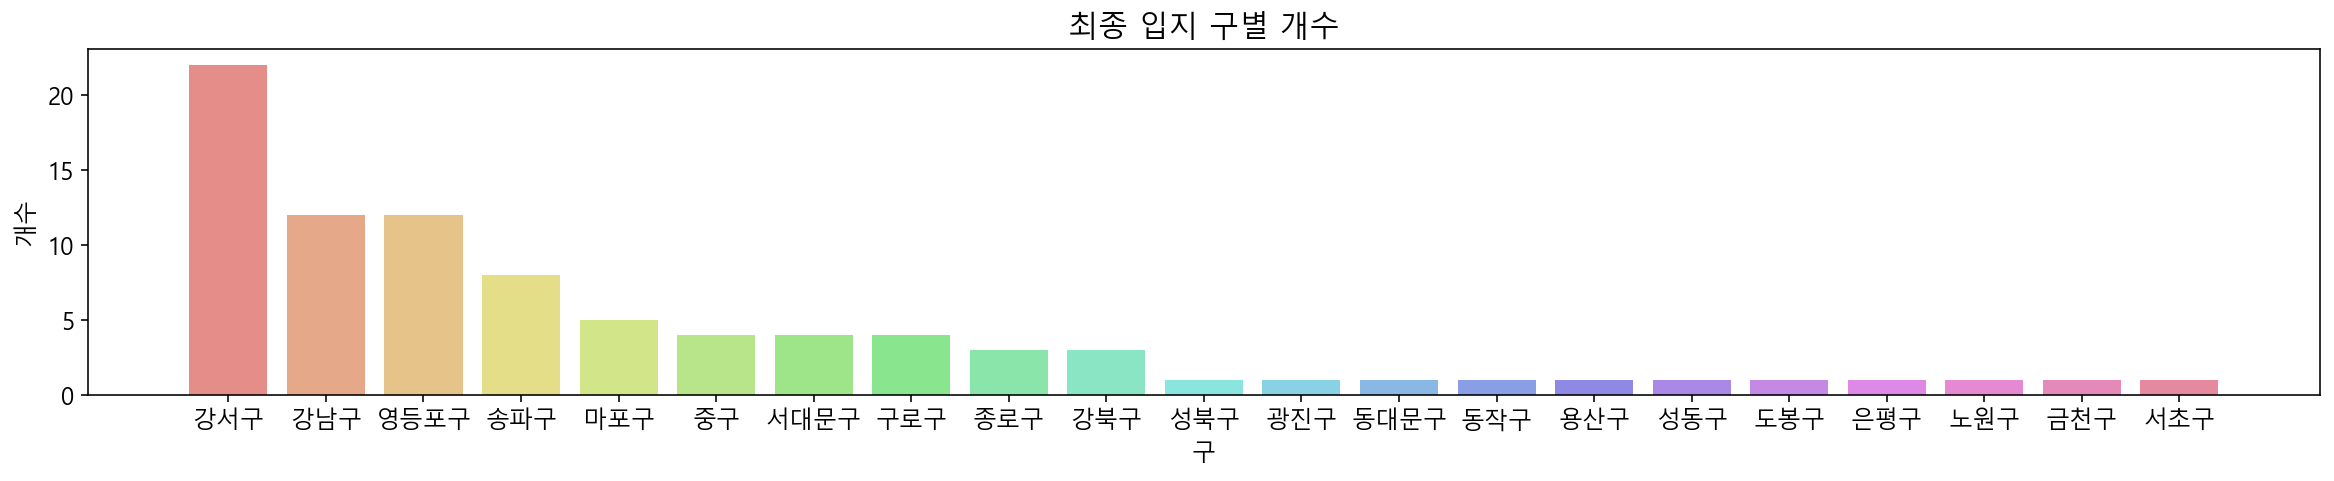

In [13]:
data=a['공영주차장(구별 개수)']
labels=a['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 공영주차장 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('공영주차장 개수',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

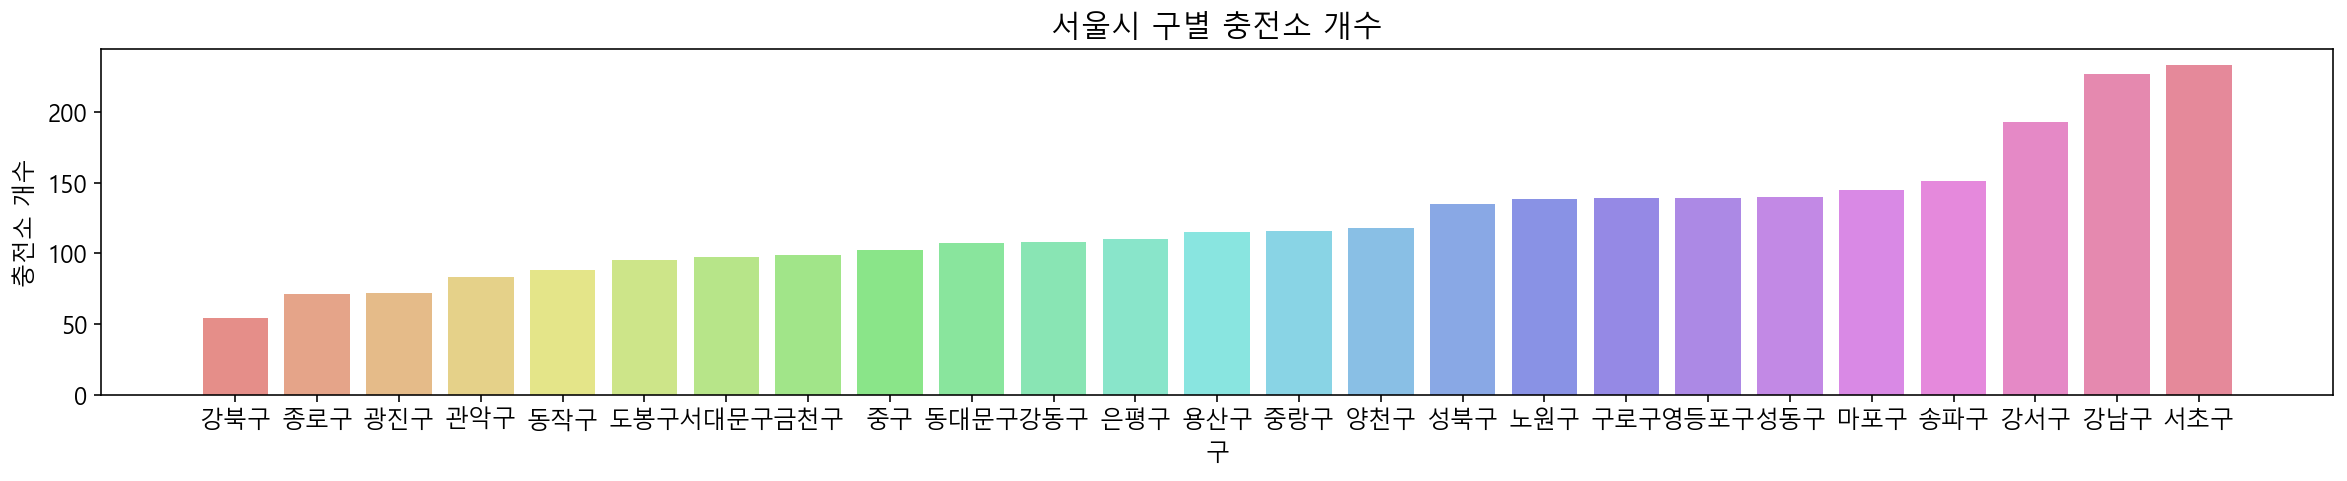

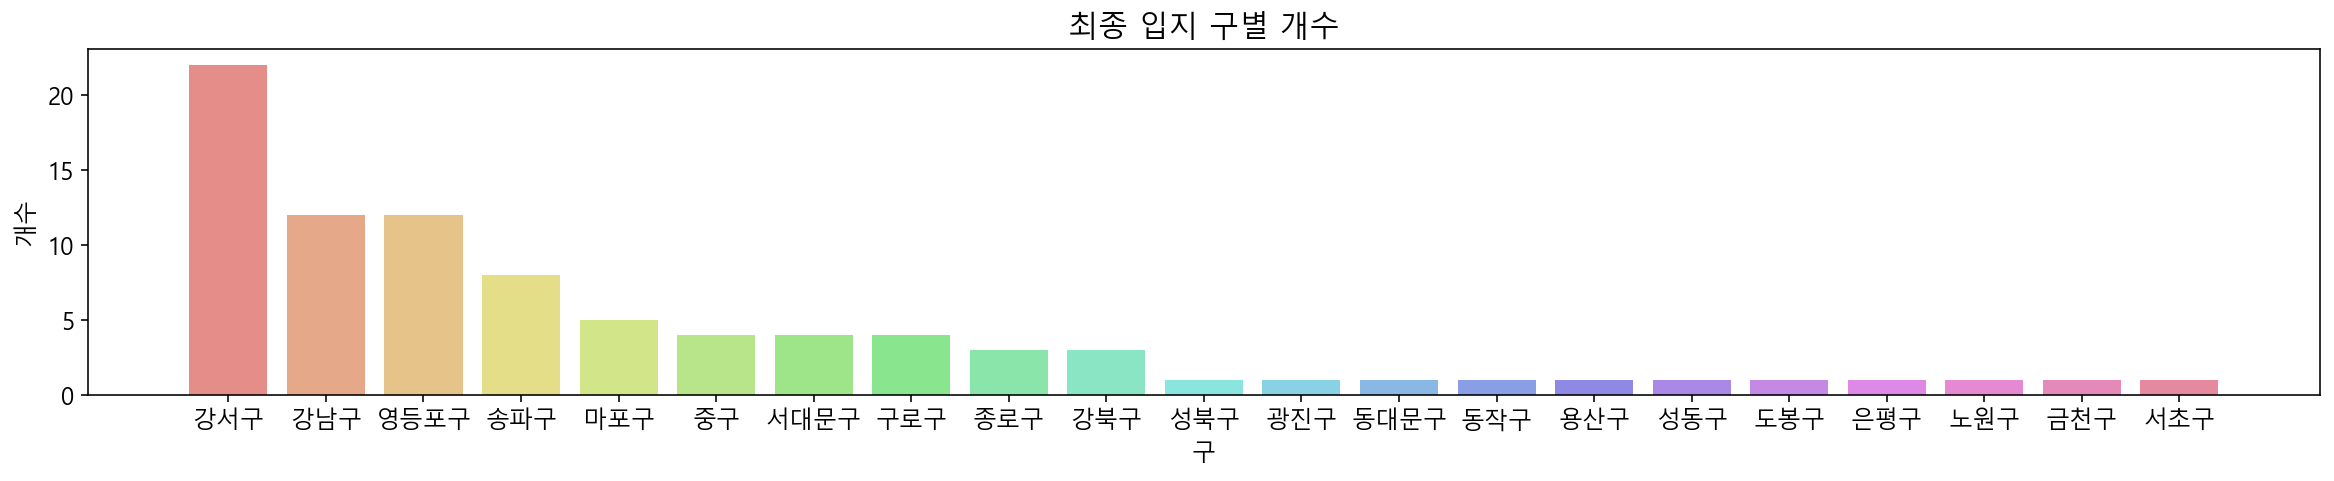

In [14]:
data=b['전체 충전소(구별 개수)']
labels=b['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 충전소 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('충전소 개수',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

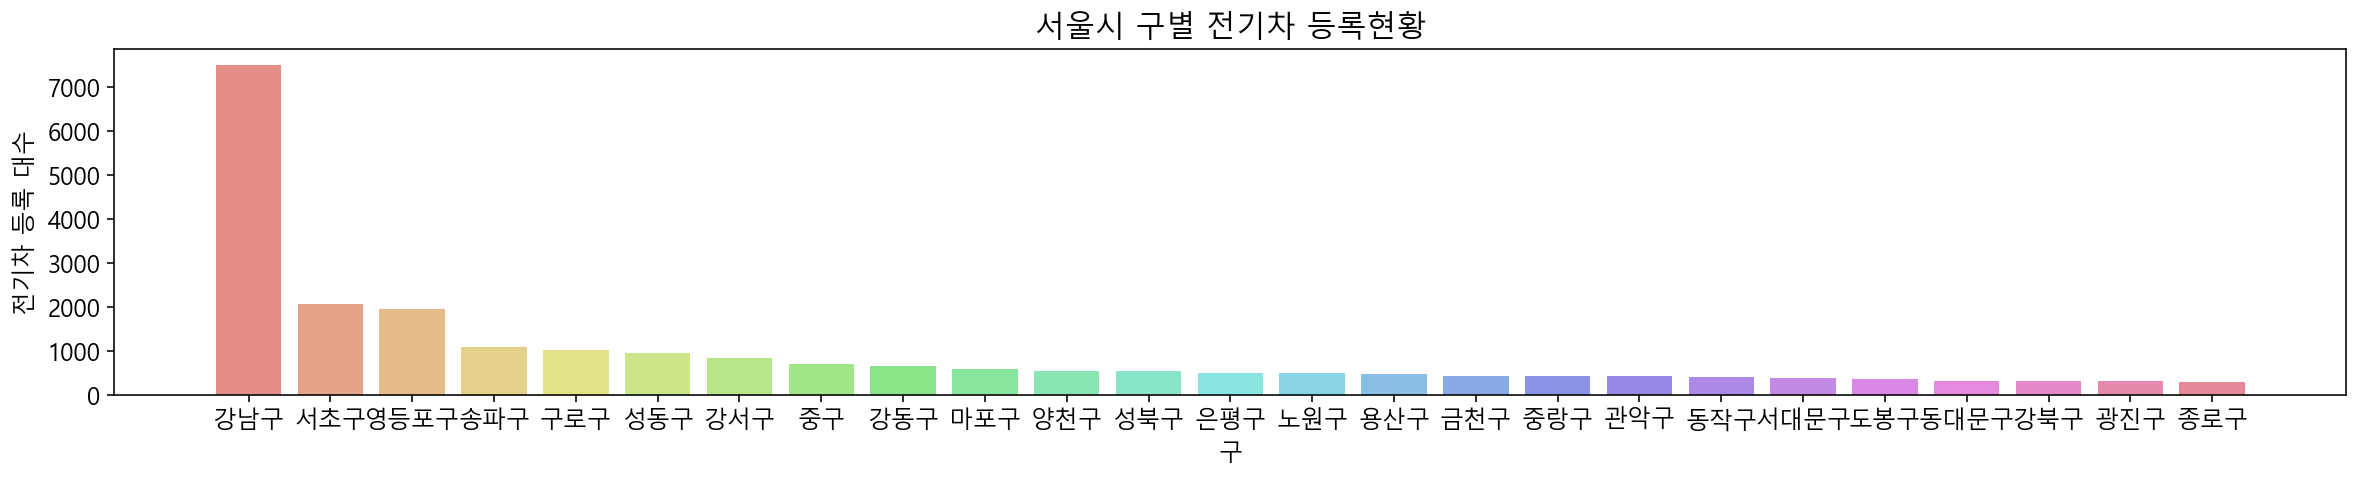

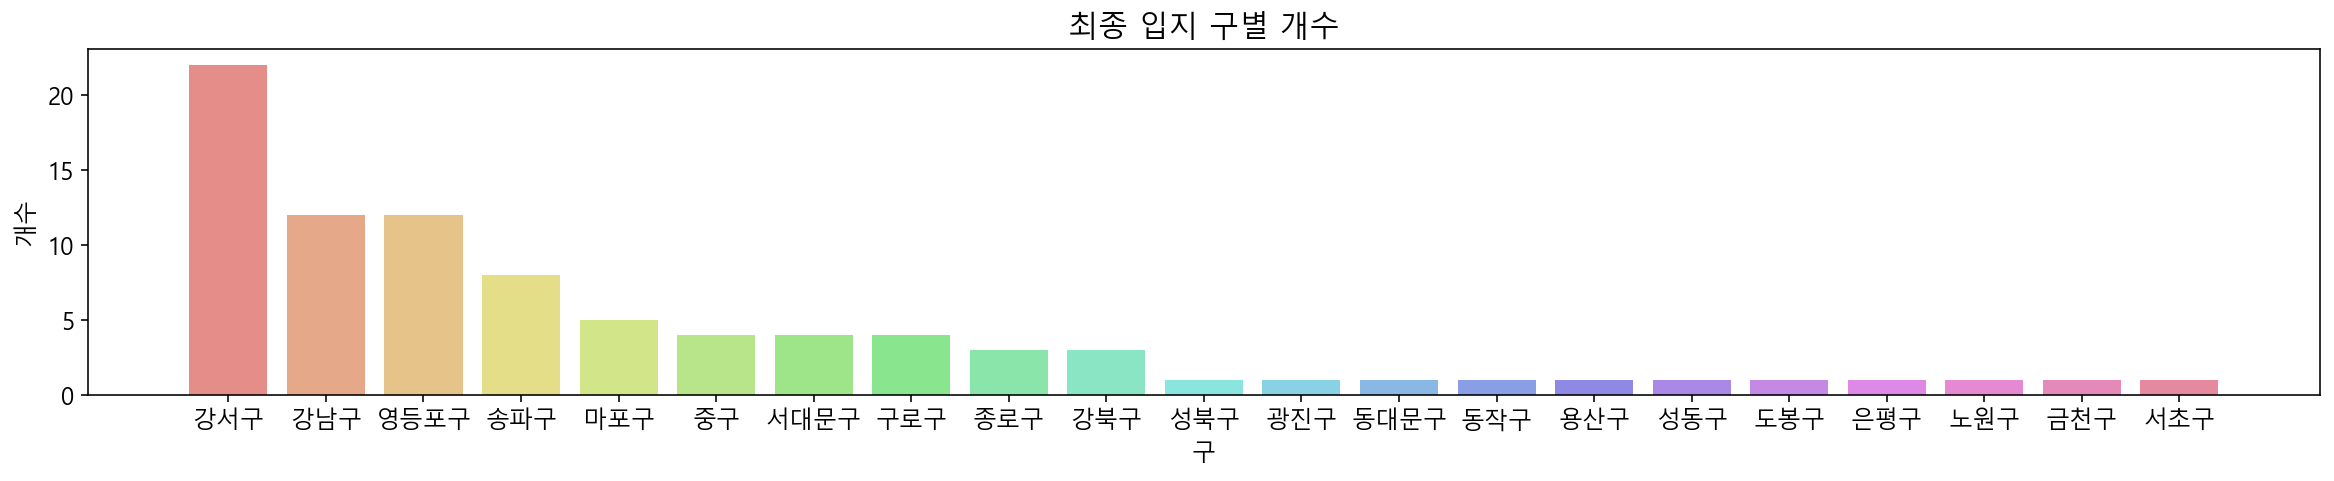

In [15]:
data=c['전기차 등록현황(구별)']
labels=c['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 전기차 등록현황',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('전기차 등록 대수',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

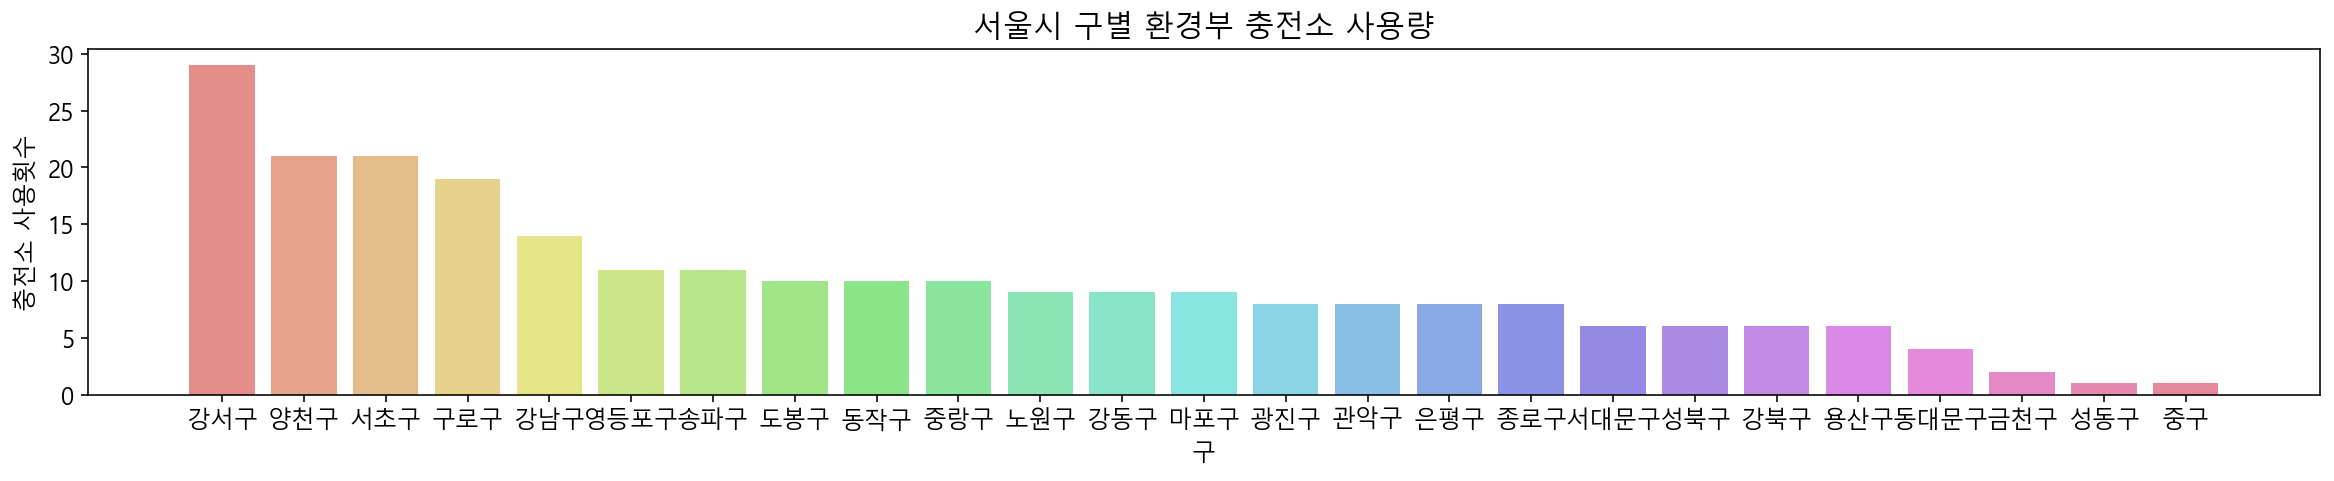

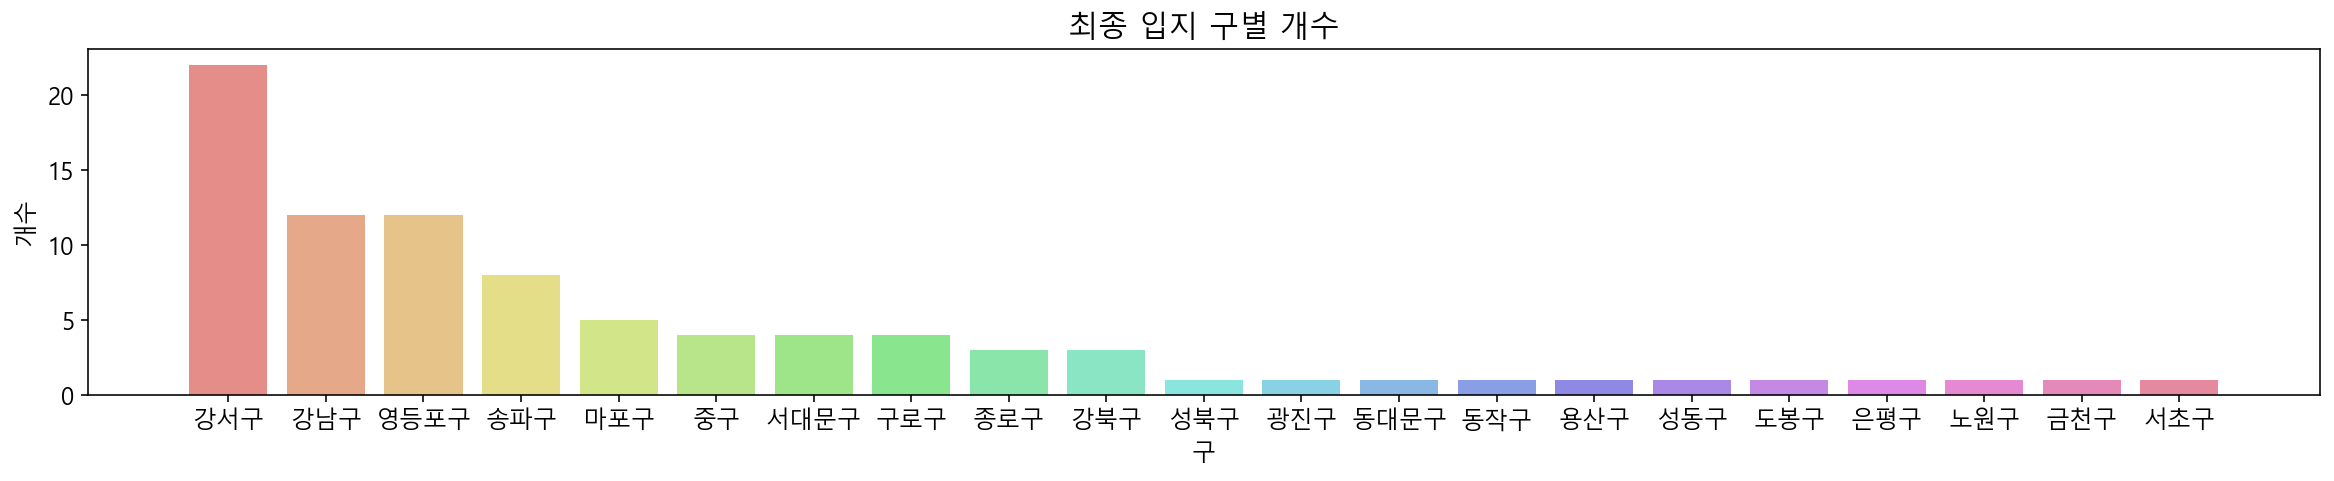

In [16]:
data=d['환경부 충전소 사용량(구별)']
labels=d['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 환경부 충전소 사용량',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('충전소 사용횟수',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

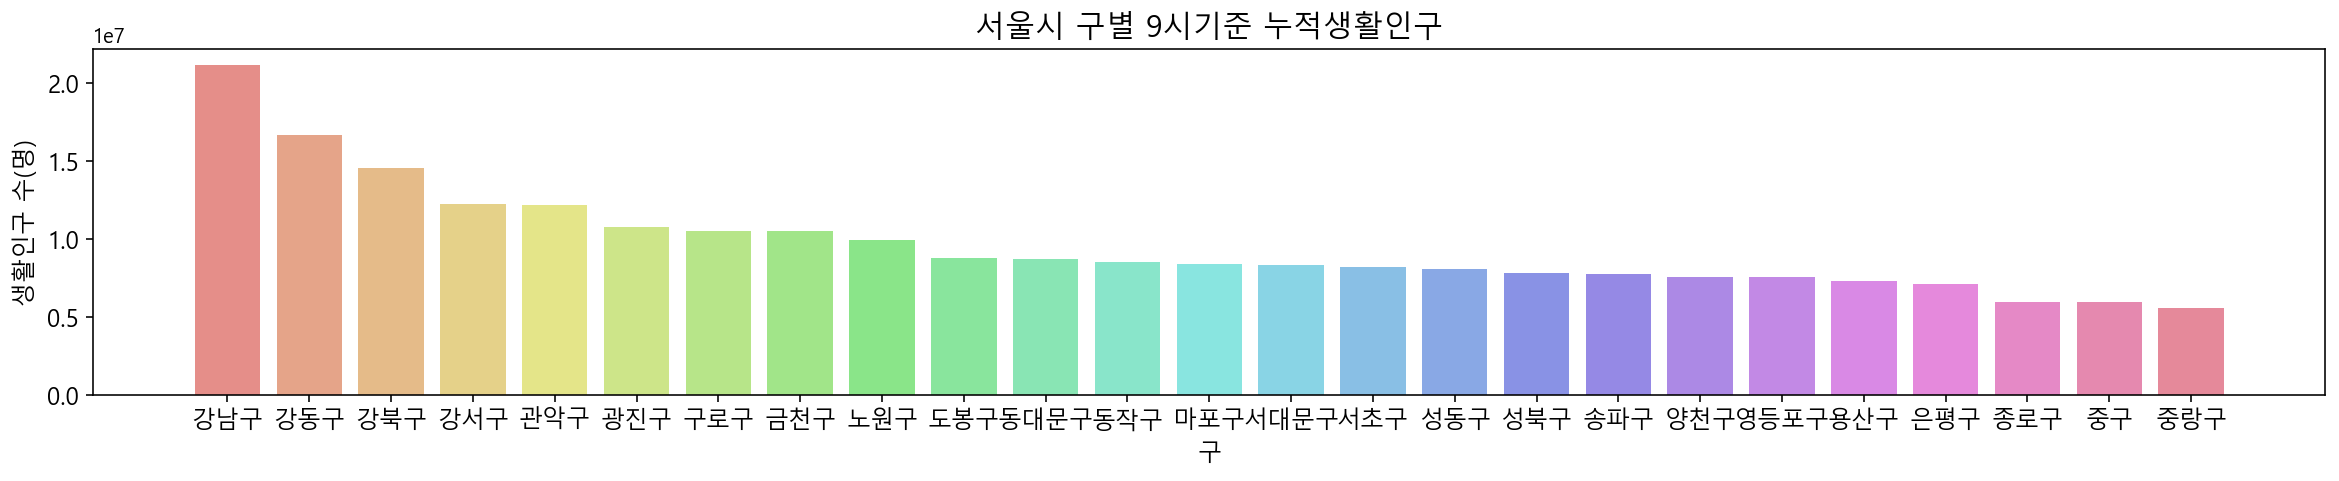

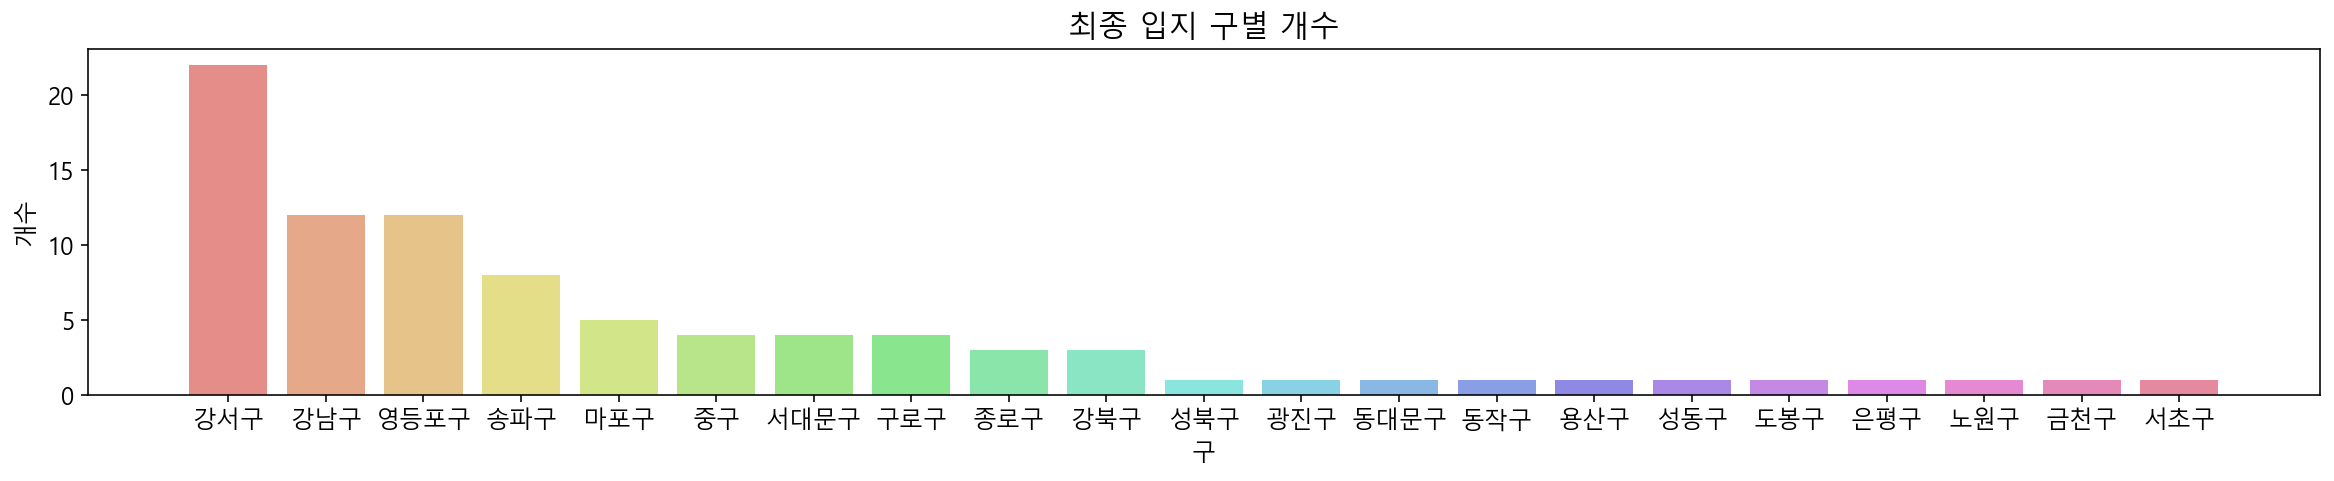

In [17]:
data=e['9시기준 누적생활인구(구별)']
labels=e['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 9시기준 누적생활인구',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('생활인구 수(명)',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

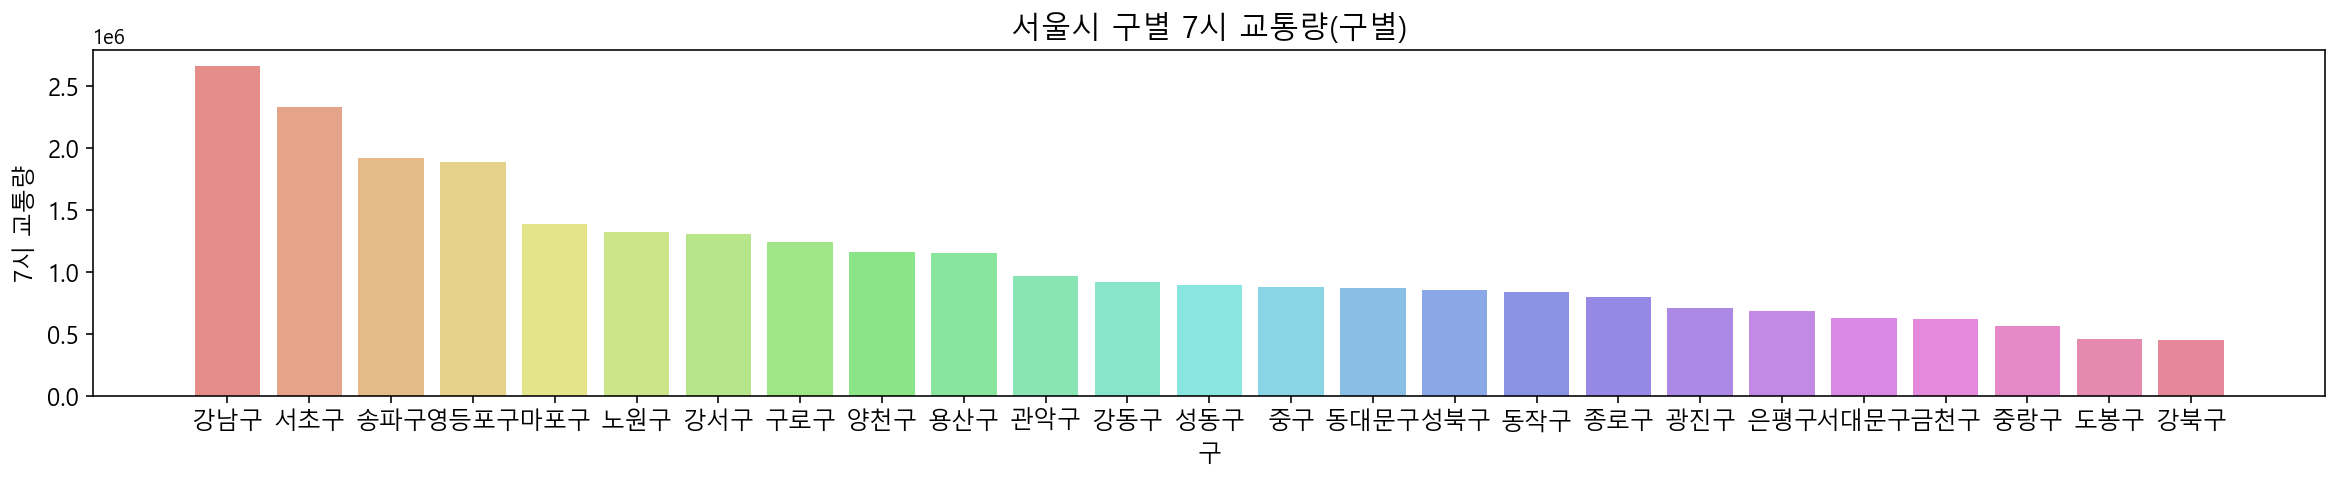

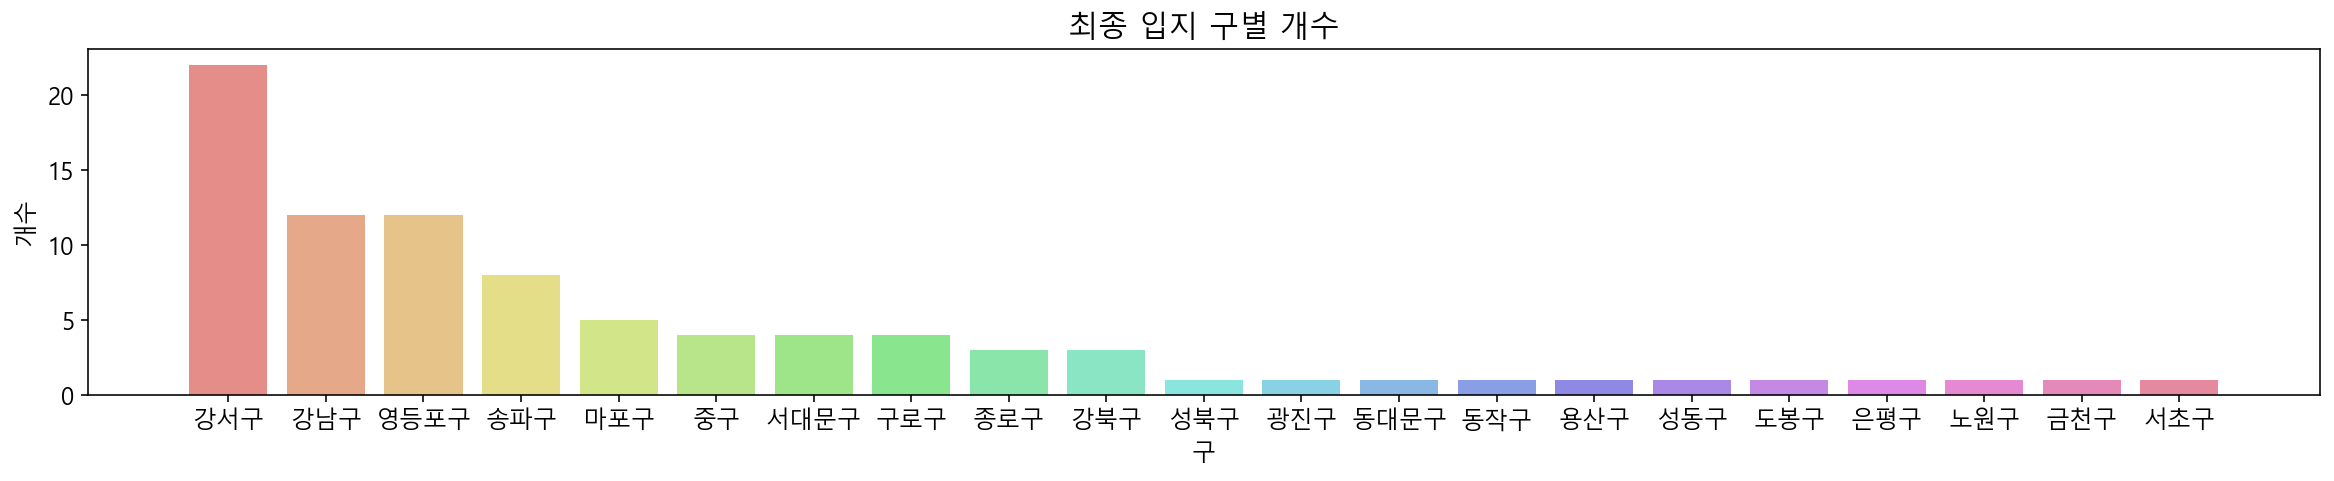

In [18]:
data=f['7시 교통량(구별)']
labels=f['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 7시 교통량(구별)',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('7시 교통량',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

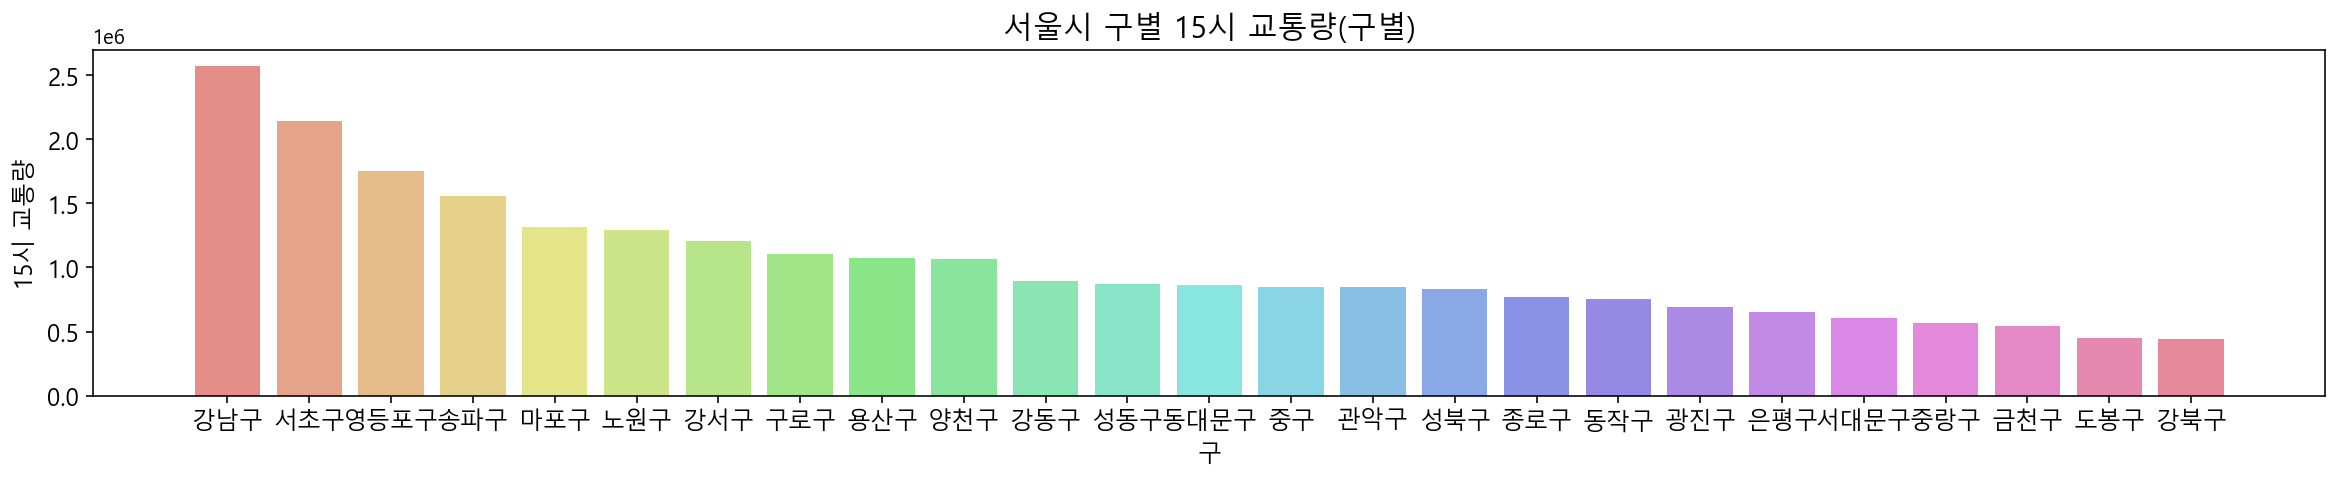

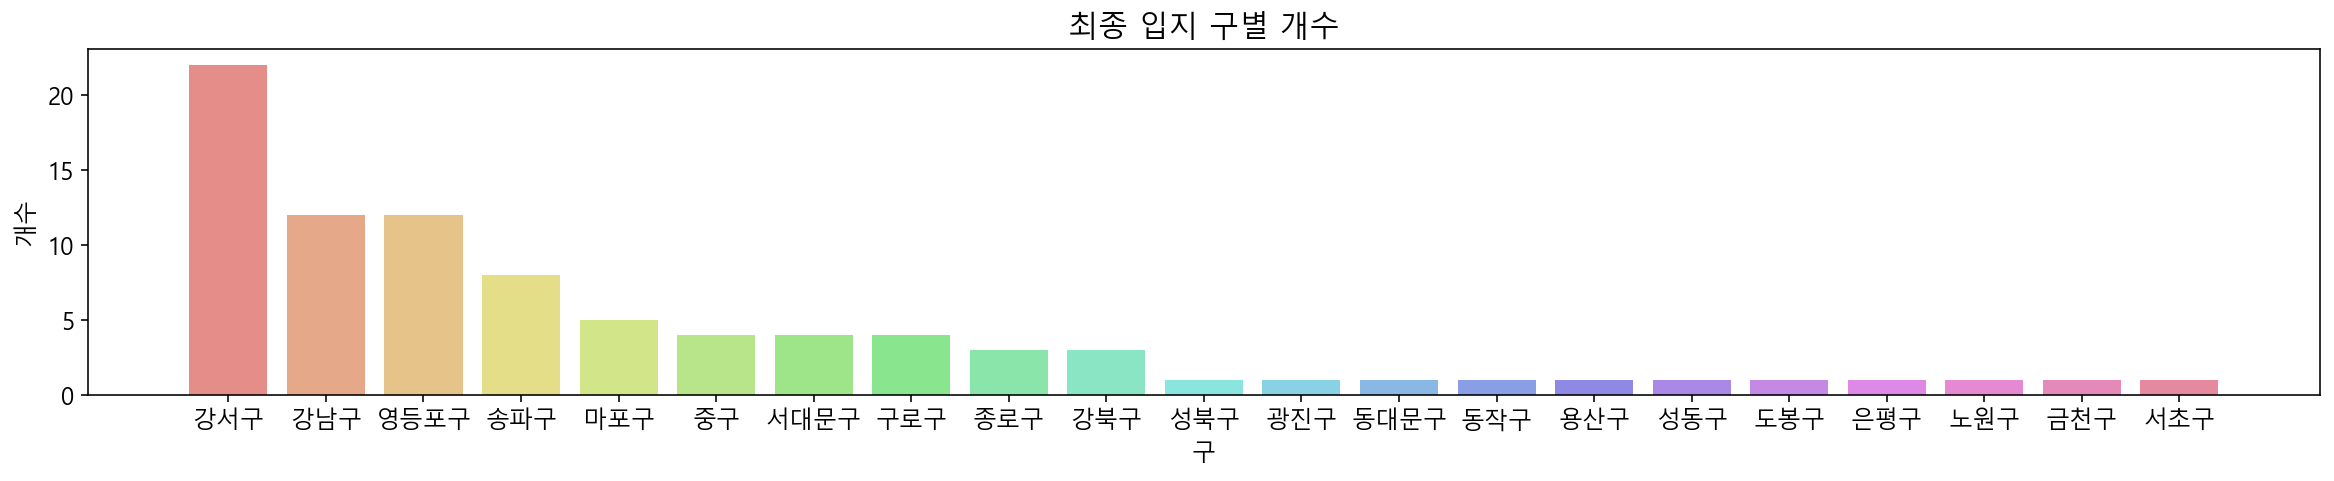

In [19]:
data=g['15시 교통량(구별)']
labels=g['구']
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('서울시 구별 15시 교통량(구별)',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('15시 교통량',fontsize=12)
plt.show()

data=loc['gu'].value_counts()
labels= loc['gu'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('최종 입지 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

In [20]:
#우선 데이터의 현황을 동별로 정리한 데이터 프레임을 불러온다.
vs2=pd.read_csv('data/구별 데이터프레임.csv')
vs2=vs2.drop([vs2.columns[1],vs2.columns[6],vs2.columns[7],vs2.columns[8],vs2.columns[10],vs2.columns[11],vs2.columns[12],vs2.columns[13]],axis=1)
vs2=vs2.rename(columns={"Unnamed: 0":"gu","환경부8/20충전소사용량(구별)":"충전소 사용횟수(구별)","전체 충전소(구별 개수)":"기존 충전소(구별 개수)"})
vs2.head()

,gu,공영주차장(구별 개수),기존 충전소(구별 개수),전기차 등록현황(구별),9시기준 누적생활인구(구별),충전소 사용횟수(구별),7시 교통량(구별),15시 교통량(구별)
0,강남구,59,227,7490,21123579,14,2659676,2571792
1,강동구,22,108,657,31630322,9,917964,898177
2,강북구,35,54,302,37585698,6,452893,438128
3,강서구,46,193,839,49730859,29,1300629,1206927
4,관악구,19,83,413,60224436,8,963254,844226


In [21]:
loc_df=pd.DataFrame({"gu":list(loc['gu'].value_counts().index),"개수":list(loc['gu'].value_counts().values)})
loc_df

,gu,개수
0,강서구,22
1,강남구,12
2,영등포구,12
3,송파구,8
4,마포구,5
5,중구,4
6,서대문구,4
7,구로구,4
8,종로구,3
9,강북구,3


In [22]:
gu_df=pd.DataFrame(vs2['gu'])
gu_df['개수']="0"
gu_df['개수']=gu_df['개수'].astype(int)
gu_df

,gu,개수
0,강남구,0
1,강동구,0
2,강북구,0
3,강서구,0
4,관악구,0
5,광진구,0
6,구로구,0
7,금천구,0
8,노원구,0
9,도봉구,0


In [23]:
for i in range(0,len(gu_df)):
    for j in range(0,len(loc_df)):
        if gu_df['gu'][i]==loc_df['gu'][j]:
            gu_df['개수'][i]=loc_df['개수'][j]
gu_df.head()

C:\Users\hrim1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,gu,개수
0,강남구,12
1,강동구,0
2,강북구,3
3,강서구,22
4,관악구,0


In [24]:
vs3=pd.merge(vs2,gu_df,on='gu')
vs3=vs3.rename(columns={"개수":"스마트폴 입지 총 개수"})
vs3.index=vs3['gu']
vs3=vs3.drop([vs3.columns[0]],axis=1)
vs3

#모든 특성이 같은 값을 가지게 하기위해 minmaxscaler 진행 + 동의 가나다순으로 정리했던 데이터프레임이기때문에 동정보를 그대로 넣어준다.
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
z_vs3=vs3.copy()
z_vs3[['공영주차장(구별 개수)','기존 충전소(구별 개수)','전기차 등록현황(구별)',"9시기준 누적생활인구(구별)","충전소 사용횟수(구별)",'7시 교통량(구별)','15시 교통량(구별)','스마트폴 입지 총 개수']]=\
scaler.fit_transform(z_vs3[['공영주차장(구별 개수)','기존 충전소(구별 개수)','전기차 등록현황(구별)',"9시기준 누적생활인구(구별)","충전소 사용횟수(구별)",'7시 교통량(구별)','15시 교통량(구별)','스마트폴 입지 총 개수']])
z_vs3.head()

,공영주차장(구별 개수),기존 충전소(구별 개수),전기차 등록현황(구별),9시기준 누적생활인구(구별),충전소 사용횟수(구별),7시 교통량(구별),15시 교통량(구별),스마트폴 입지 총 개수
gu,,,,,,,,
강남구,0.6375,0.966480,1.000000,0.000000,0.464286,1.000000,1.000000,0.545455
강동구,0.1750,0.301676,0.052157,0.048088,0.285714,0.210746,0.215615,0.000000
강북구,0.3375,0.000000,0.002913,0.075344,0.178571,0.000000,0.000000,0.136364
강서구,0.4750,0.776536,0.077403,0.130931,1.000000,0.384150,0.360319,1.000000
관악구,0.1375,0.162011,0.018310,0.178958,0.250000,0.231269,0.190329,0.000000


In [25]:
#피어슨상관계수 진행한다.
vs3.loc[:,('공영주차장(구별 개수)', '기존 충전소(구별 개수)', '전기차 등록현황(구별)',\
       '9시기준 누적생활인구(구별)', '충전소 사용횟수(구별)', '7시 교통량(구별)', '15시 교통량(구별)',\
       '스마트폴 입지 총 개수')].corr(method='pearson')

,공영주차장(구별 개수),기존 충전소(구별 개수),전기차 등록현황(구별),9시기준 누적생활인구(구별),충전소 사용횟수(구별),7시 교통량(구별),15시 교통량(구별),스마트폴 입지 총 개수
공영주차장(구별 개수),1.000000,0.231721,0.362697,0.294582,0.063666,0.403322,0.409201,0.457104
기존 충전소(구별 개수),0.231721,1.000000,0.676037,-0.087098,0.583539,0.848462,0.858623,0.519660
전기차 등록현황(구별),0.362697,0.676037,1.000000,-0.262501,0.253088,0.764317,0.799376,0.438912
9시기준 누적생활인구(구별),0.294582,-0.087098,-0.262501,1.000000,-0.199537,-0.079306,-0.094506,-0.193400
충전소 사용횟수(구별),0.063666,0.583539,0.253088,-0.199537,1.000000,0.483761,0.468430,0.533439
7시 교통량(구별),0.403322,0.848462,0.764317,-0.079306,0.483761,1.000000,0.993532,0.490574
15시 교통량(구별),0.409201,0.858623,0.799376,-0.094506,0.468430,0.993532,1.000000,0.484725
스마트폴 입지 총 개수,0.457104,0.519660,0.438912,-0.193400,0.533439,0.490574,0.484725,1.000000


<AxesSubplot:title={'center':'스마트폴 위치 선정의 기준 데이터 상관관계 분석(구별)'}>

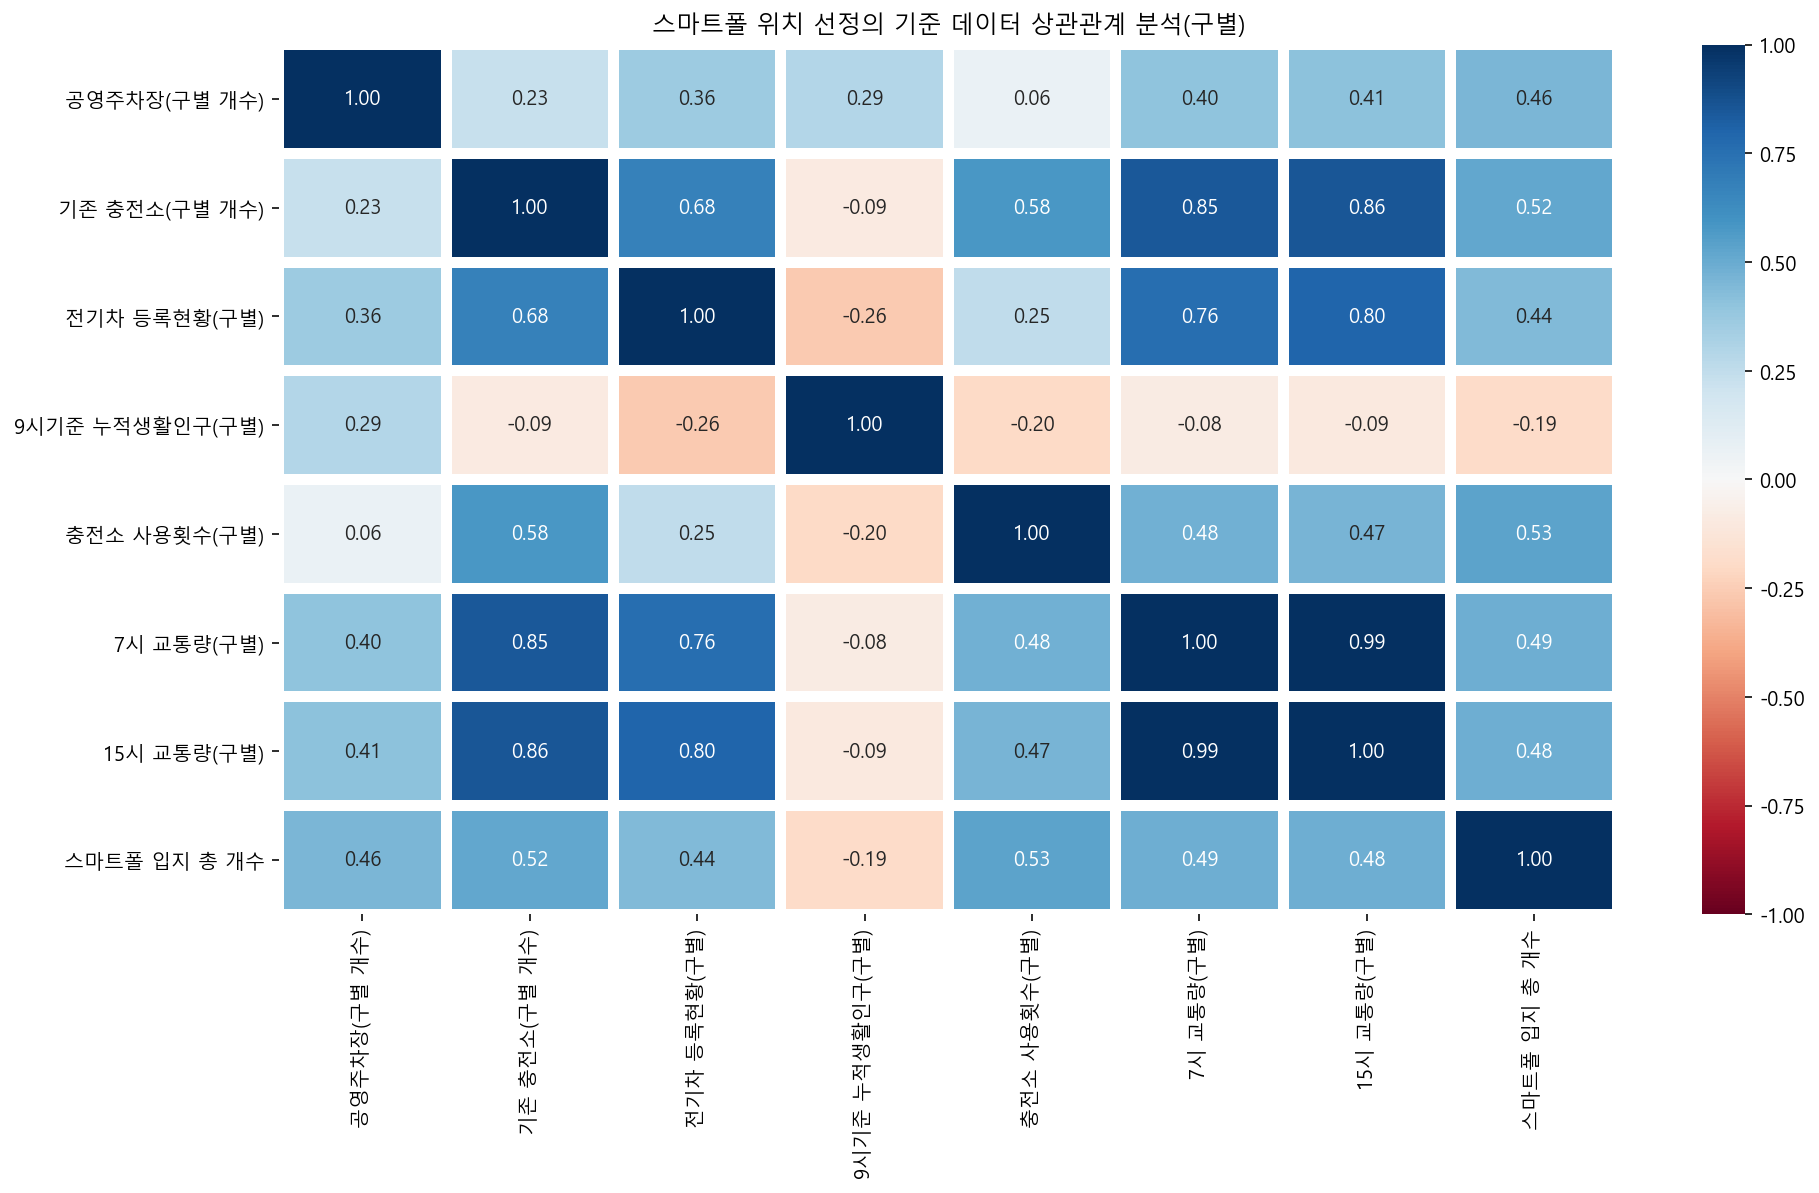

In [26]:
# 피어슨 상관계수 히트맵 그리기 => 파란색이 짙을수록 상관관계 높고 빨간색이 진할수록 낮음
plt.figure(figsize=(15,8))
plt.title('스마트폴 위치 선정의 기준 데이터 상관관계 분석(구별)')
sns.heatmap(data=vs3.corr(),annot=True,fmt='.2f',linewidths=5,cmap='RdBu',vmin=-1,vmax=1,center=0)

In [27]:
test=test.rename(columns={"환경부 충전소 사용량(동별)":"충전소 사용횟수(동별)","전체 충전소(동별 개수)":"기존 충전소(동별 개수)"})
test.head()

,공영주차장(동별 개수),기존 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),충전소 사용횟수(동별),7시교통량(동별),15시교통량(동별),동
0,13,25,5938,2768820,2,350008,337874,대치동
1,29,30,1481,3072696,1,449565,421553,여의도동
2,4,69,985,3317382,6,500266,464393,서초동
3,17,66,776,3821371,6,484410,432284,구로동
4,5,41,580,4800878,0,361172,348387,역삼동


In [28]:
d_df=pd.DataFrame({"동":list(loc['동'].value_counts().index),"개수":list(loc['동'].value_counts().values)})
d_df

,동,개수
0,화곡동,22
1,개포동,5
2,잠실동,5
3,홍제동,3
4,개봉동,3
5,청담동,3
6,영등포동1가,2
7,평창동,2
8,동교동,2
9,영등포동7가,2


In [29]:
d_df2=pd.DataFrame(test['동'])
d_df2['개수']="0"
d_df2['개수']=d_df2['개수'].astype(int)
d_df2

,동,개수
0,대치동,0
1,여의도동,0
2,서초동,0
3,구로동,0
4,역삼동,0
...,...,...
462,저동2가,0
463,안암동4가,0
464,종로1가,0
465,양평동,0


In [30]:
for i in range(0,len(d_df2)):
    for j in range(0,len(d_df)):
        if d_df2['동'][i]==d_df['동'][j]:
            d_df2['개수'][i]=d_df['개수'][j]
d_df2.head()

C:\Users\hrim1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,동,개수
0,대치동,1
1,여의도동,1
2,서초동,0
3,구로동,0
4,역삼동,0


In [31]:
vs4=pd.merge(test,d_df2,on='동')
vs4=vs4.rename(columns={"개수":"스마트폴 입지 총 개수"})
vs4.index=vs4['동']
vs4=vs4.drop([vs4.columns[7]],axis=1)
vs4

#모든 특성이 같은 값을 가지게 하기위해 minmaxscaler 진행 + 동의 가나다순으로 정리했던 데이터프레임이기때문에 동정보를 그대로 넣어준다.
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
z_vs4=vs4.copy()
z_vs4[['공영주차장(동별 개수)','기존 충전소(동별 개수)','전기차 등록현황(동별)',"9시기준 누적생활인구(동별)","충전소 사용횟수(동별)",'7시교통량(동별)','15시교통량(동별)','스마트폴 입지 총 개수']]=\
scaler.fit_transform(z_vs4[['공영주차장(동별 개수)','기존 충전소(동별 개수)','전기차 등록현황(동별)',"9시기준 누적생활인구(동별)","충전소 사용횟수(동별)",'7시교통량(동별)','15시교통량(동별)','스마트폴 입지 총 개수']])
z_vs4.head()

,공영주차장(동별 개수),기존 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),충전소 사용횟수(동별),7시교통량(동별),15시교통량(동별),스마트폴 입지 총 개수
동,,,,,,,,
대치동,0.448276,0.362319,1.000000,0.507518,0.2,0.612631,0.653620,0.045455
여의도동,1.000000,0.434783,0.249411,0.563218,0.1,0.786890,0.815498,0.045455
서초동,0.137931,1.000000,0.165881,0.608068,0.6,0.875633,0.898372,0.000000
구로동,0.586207,0.956522,0.130684,0.700448,0.6,0.847880,0.836257,0.000000
역삼동,0.172414,0.594203,0.097676,0.879989,0.0,0.632172,0.673958,0.000000


In [32]:
test.sort_values(by='공영주차장(동별 개수)',ascending=False)

,공영주차장(동별 개수),기존 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),충전소 사용횟수(동별),7시교통량(동별),15시교통량(동별),동
1,29,30,1481,3072696,1,449565,421553,여의도동
16,26,0,170,22250,0,188552,178158,화곡동
11,20,61,220,2363375,0,210345,185044,가산동
300,20,54,3,201086,7,446215,410365,신정동
57,20,19,79,1607169,0,99166,98065,신당동
...,...,...,...,...,...,...,...,...
287,0,0,4,72119,0,4312,4176,천연동
289,0,1,4,49270,0,2695,2596,계동
292,0,0,3,37375,0,4758,4420,누상동
293,0,0,3,64952,0,12917,12073,청암동


In [33]:
#피어슨상관계수 진행한다.
vs4.loc[:,('공영주차장(동별 개수)', '기존 충전소(동별 개수)', '전기차 등록현황(동별)',\
       '9시기준 누적생활인구(동별)', '충전소 사용횟수(동별)', '7시교통량(동별)', '15시교통량(동별)',\
       '스마트폴 입지 총 개수')].corr(method='pearson')

,공영주차장(동별 개수),기존 충전소(동별 개수),전기차 등록현황(동별),9시기준 누적생활인구(동별),충전소 사용횟수(동별),7시교통량(동별),15시교통량(동별),스마트폴 입지 총 개수
공영주차장(동별 개수),1.000000,0.588056,0.340191,0.604103,0.442240,0.675543,0.674989,0.352261
기존 충전소(동별 개수),0.588056,1.000000,0.294587,0.804548,0.560232,0.813868,0.815945,-0.024550
전기차 등록현황(동별),0.340191,0.294587,1.000000,0.347619,0.167545,0.377990,0.385356,0.064961
9시기준 누적생활인구(동별),0.604103,0.804548,0.347619,1.000000,0.512921,0.850851,0.848418,0.031963
충전소 사용횟수(동별),0.442240,0.560232,0.167545,0.512921,1.000000,0.566669,0.561371,0.070753
7시교통량(동별),0.675543,0.813868,0.377990,0.850851,0.566669,1.000000,0.995872,0.135608
15시교통량(동별),0.674989,0.815945,0.385356,0.848418,0.561371,0.995872,1.000000,0.138083
스마트폴 입지 총 개수,0.352261,-0.024550,0.064961,0.031963,0.070753,0.135608,0.138083,1.000000


<AxesSubplot:title={'center':'스마트폴 위치 선정의 기준 데이터 상관관계 분석(구별)'}>

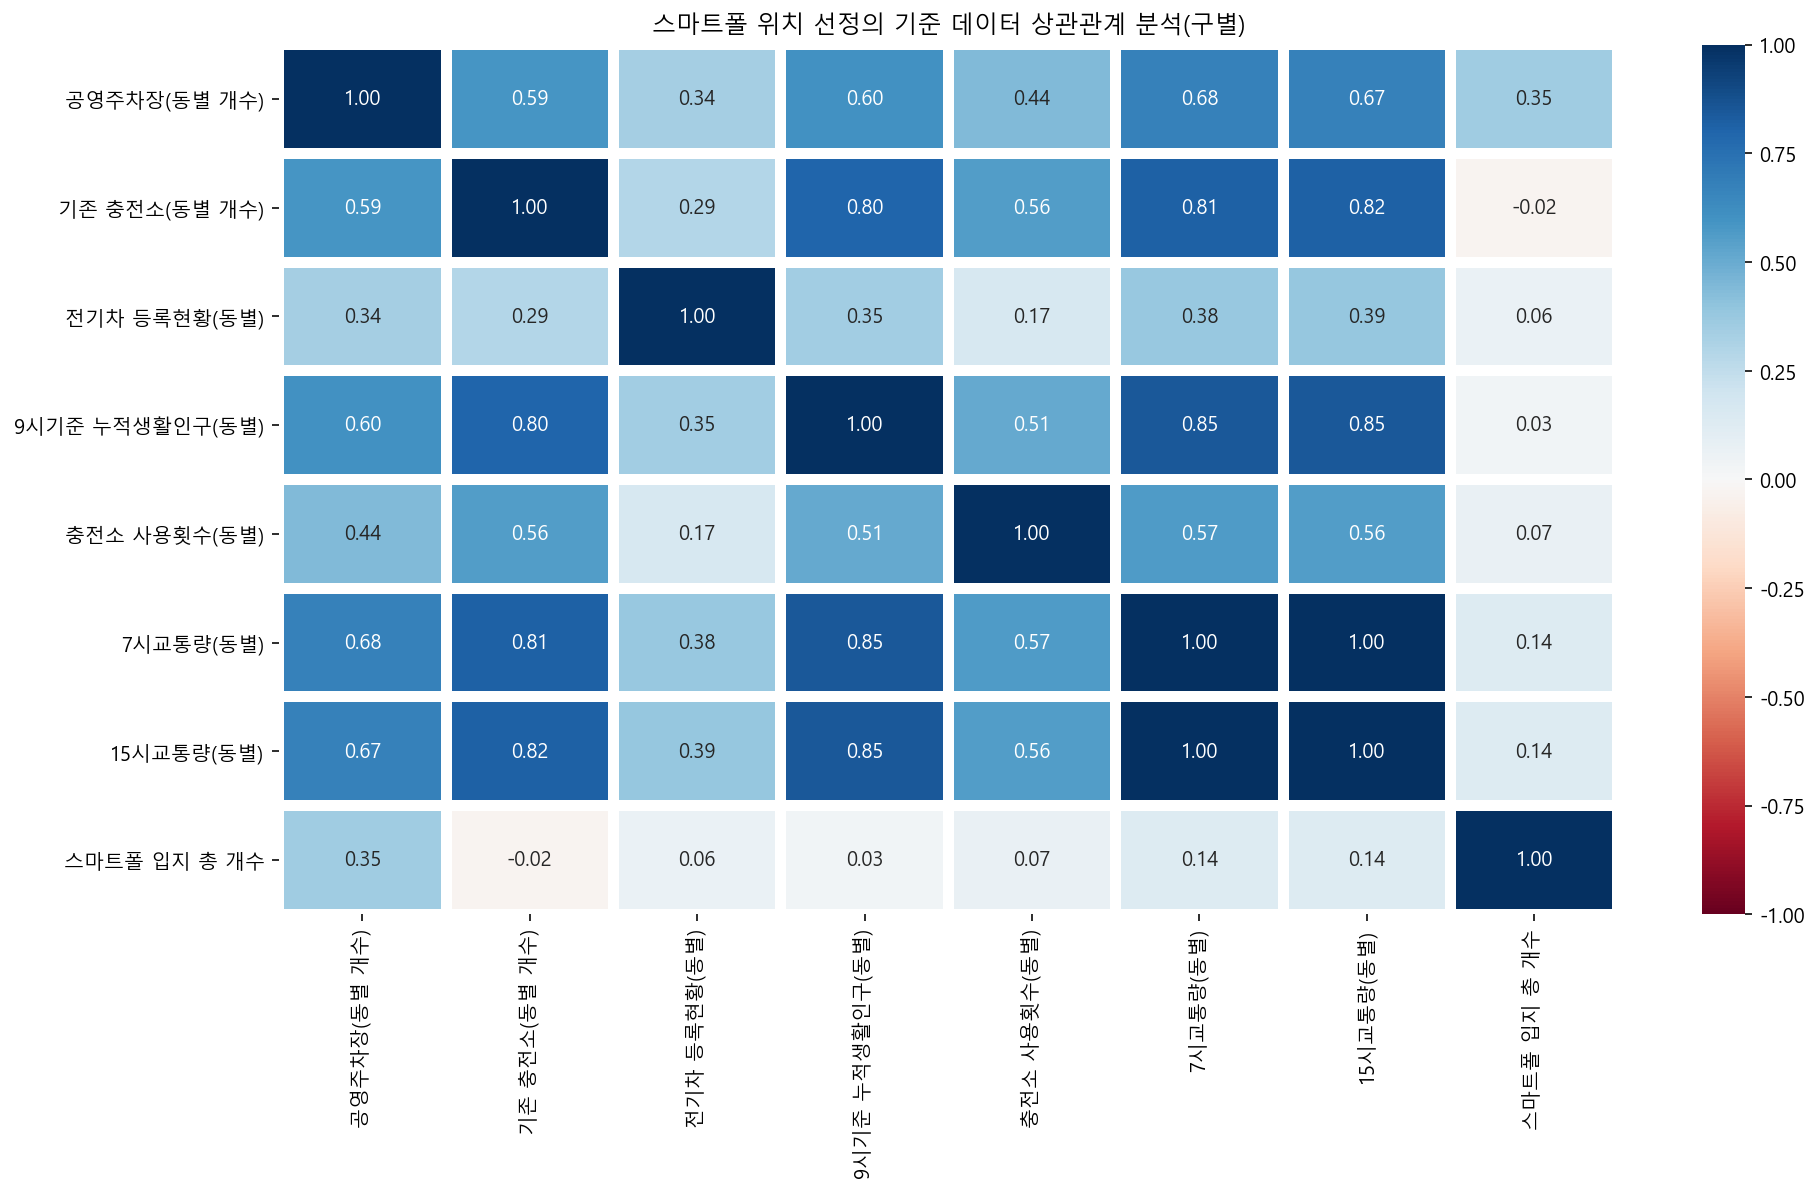

In [34]:
# 피어슨 상관계수 히트맵 그리기 => 파란색이 짙을수록 상관관계 높고 빨간색이 진할수록 낮음
plt.figure(figsize=(15,8))
plt.title('스마트폴 위치 선정의 기준 데이터 상관관계 분석(구별)')
sns.heatmap(data=vs4.corr(),annot=True,fmt='.2f',linewidths=5,cmap='RdBu',vmin=-1,vmax=1,center=0)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = z_vs4[['공영주차장(동별 개수)', '기존 충전소(동별 개수)', '전기차 등록현황(동별)',\
       '9시기준 누적생활인구(동별)', '충전소 사용횟수(동별)', '7시교통량(동별)', '15시교통량(동별)']]
y = z_vs4['스마트폴 입지 총 개수']
regr = linear_model.LinearRegression()
regr.fit(X, y)
FS_coeff = regr.coef_
print('스마트폴 입지 Intercept: ', regr.intercept_) #절편 
print('스마트폴 입지 Coefficients: \n', FS_coeff) #기울기

스마트폴 입지 Intercept:  0.00357558587260728
스마트폴 입지 Coefficients: 
 [ 0.2210471  -0.13558628 -0.04332913 -0.06957346  0.00489507 -0.09271796
  0.1838785 ]


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = z_vs3[['공영주차장(구별 개수)','기존 충전소(구별 개수)','전기차 등록현황(구별)',"9시기준 누적생활인구(구별)","충전소 사용횟수(구별)",'7시 교통량(구별)','15시 교통량(구별)']]
y = z_vs3['스마트폴 입지 총 개수']
regr = linear_model.LinearRegression()
regr.fit(X, y)
FS_coeff = regr.coef_
print('스마트폴 입지 Intercept: ', regr.intercept_) #절편 
print('스마트폴 입지 Coefficients: \n', FS_coeff) #기울기

스마트폴 입지 Intercept:  -0.07986404089742899
스마트폴 입지 Coefficients: 
 [ 0.48522533  0.40484653  0.21383539 -0.1887556   0.3233281   1.10683702
 -1.56127126]


In [41]:
from sklearn.model_selection import train_test_split

df=z_vs4[['공영주차장(동별 개수)', '기존 충전소(동별 개수)', '전기차 등록현황(동별)',\
       '9시기준 누적생활인구(동별)', '충전소 사용횟수(동별)', '7시교통량(동별)', '15시교통량(동별)','스마트폴 입지 총 개수']]
X = df[df.columns.difference(['y'])]
y = df['스마트폴 입지 총 개수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [42]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           스마트폴 입지 총 개수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.548e+31
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:06:03   Log-Likelihood:                 13292.
No. Observations:                 375   AIC:                        -2.657e+04
Df Residuals:                     366   BIC:                        -2.653e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.286e-17   6.25e-18     13.266      0.000    7.06e-17    9.51e-17
15시교통량(동별)      -4.285e-16   3.36e-16     -1.274      0.203   -1.09e-15    2.33e-16
7시교통량(동별)       -3.469e-16   3.42e-16     -1.014      0.311   -1.02e-15    3.26e-16
9시기준 누적생활인구(동별)  1.115e-16   7.96e-17      1.400      0.162   -4.51e-17    2.68e-16
공영주차장(동별 개수)     5.152e-16   6.44e-17      8.004      0.000    3.89e-16    6.42e-16
기존 충전소(동별 개수)    5.378e-17   7.36e-17      0.731      0.465    -9.1e-17    1.99e-16
스마트폴 입지 총 개수        1.0000   1.08e-16   9.25e+15      0.000       1.000       1.000
전기차 등록현황(동별)    -5.226e-16   1.05e-16     -4.982      0.000   -7.29e-16   -3.16e-16
충전소 사용횟수(동별)     4.521e-17   4.83e-17      0.937      0.350   -4.97e-17     1.4e-16
==============================================================================
Omnibus:                      291.585   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5488.399
Skew:                           3.127   Prob(JB):                         0.00
Kurtosis:                      20.668   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""